In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

**Read data**

In [0]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Facebook_metrics/dataset_Facebook.csv",delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

**Rename columns**

In [0]:
df.rename(columns={
    'Lifetime Post Total Reach':'LPTR',
    'Lifetime Post Total Impressions':'LPTI',
    'Lifetime Engaged Users' : 'LEU',
    'Lifetime Post Consumers' : 'LPCM',
    'Lifetime Post Consumptions' : 'LPCP',
    'Lifetime Post Impressions by people who have liked your Page' : 'LPI',
    'Lifetime Post reach by people who like your Page' : 'LPR',
    'Lifetime People who have liked your Page and engaged with your post' : 'LPW'
     }, 
          inplace=True)

**Fill NULL value with 0**

In [0]:
df['like'].fillna(0,inplace=True)
df['share'].fillna(0,inplace=True)
df['Paid'].fillna(0,inplace=True)

**Correlation Plot**

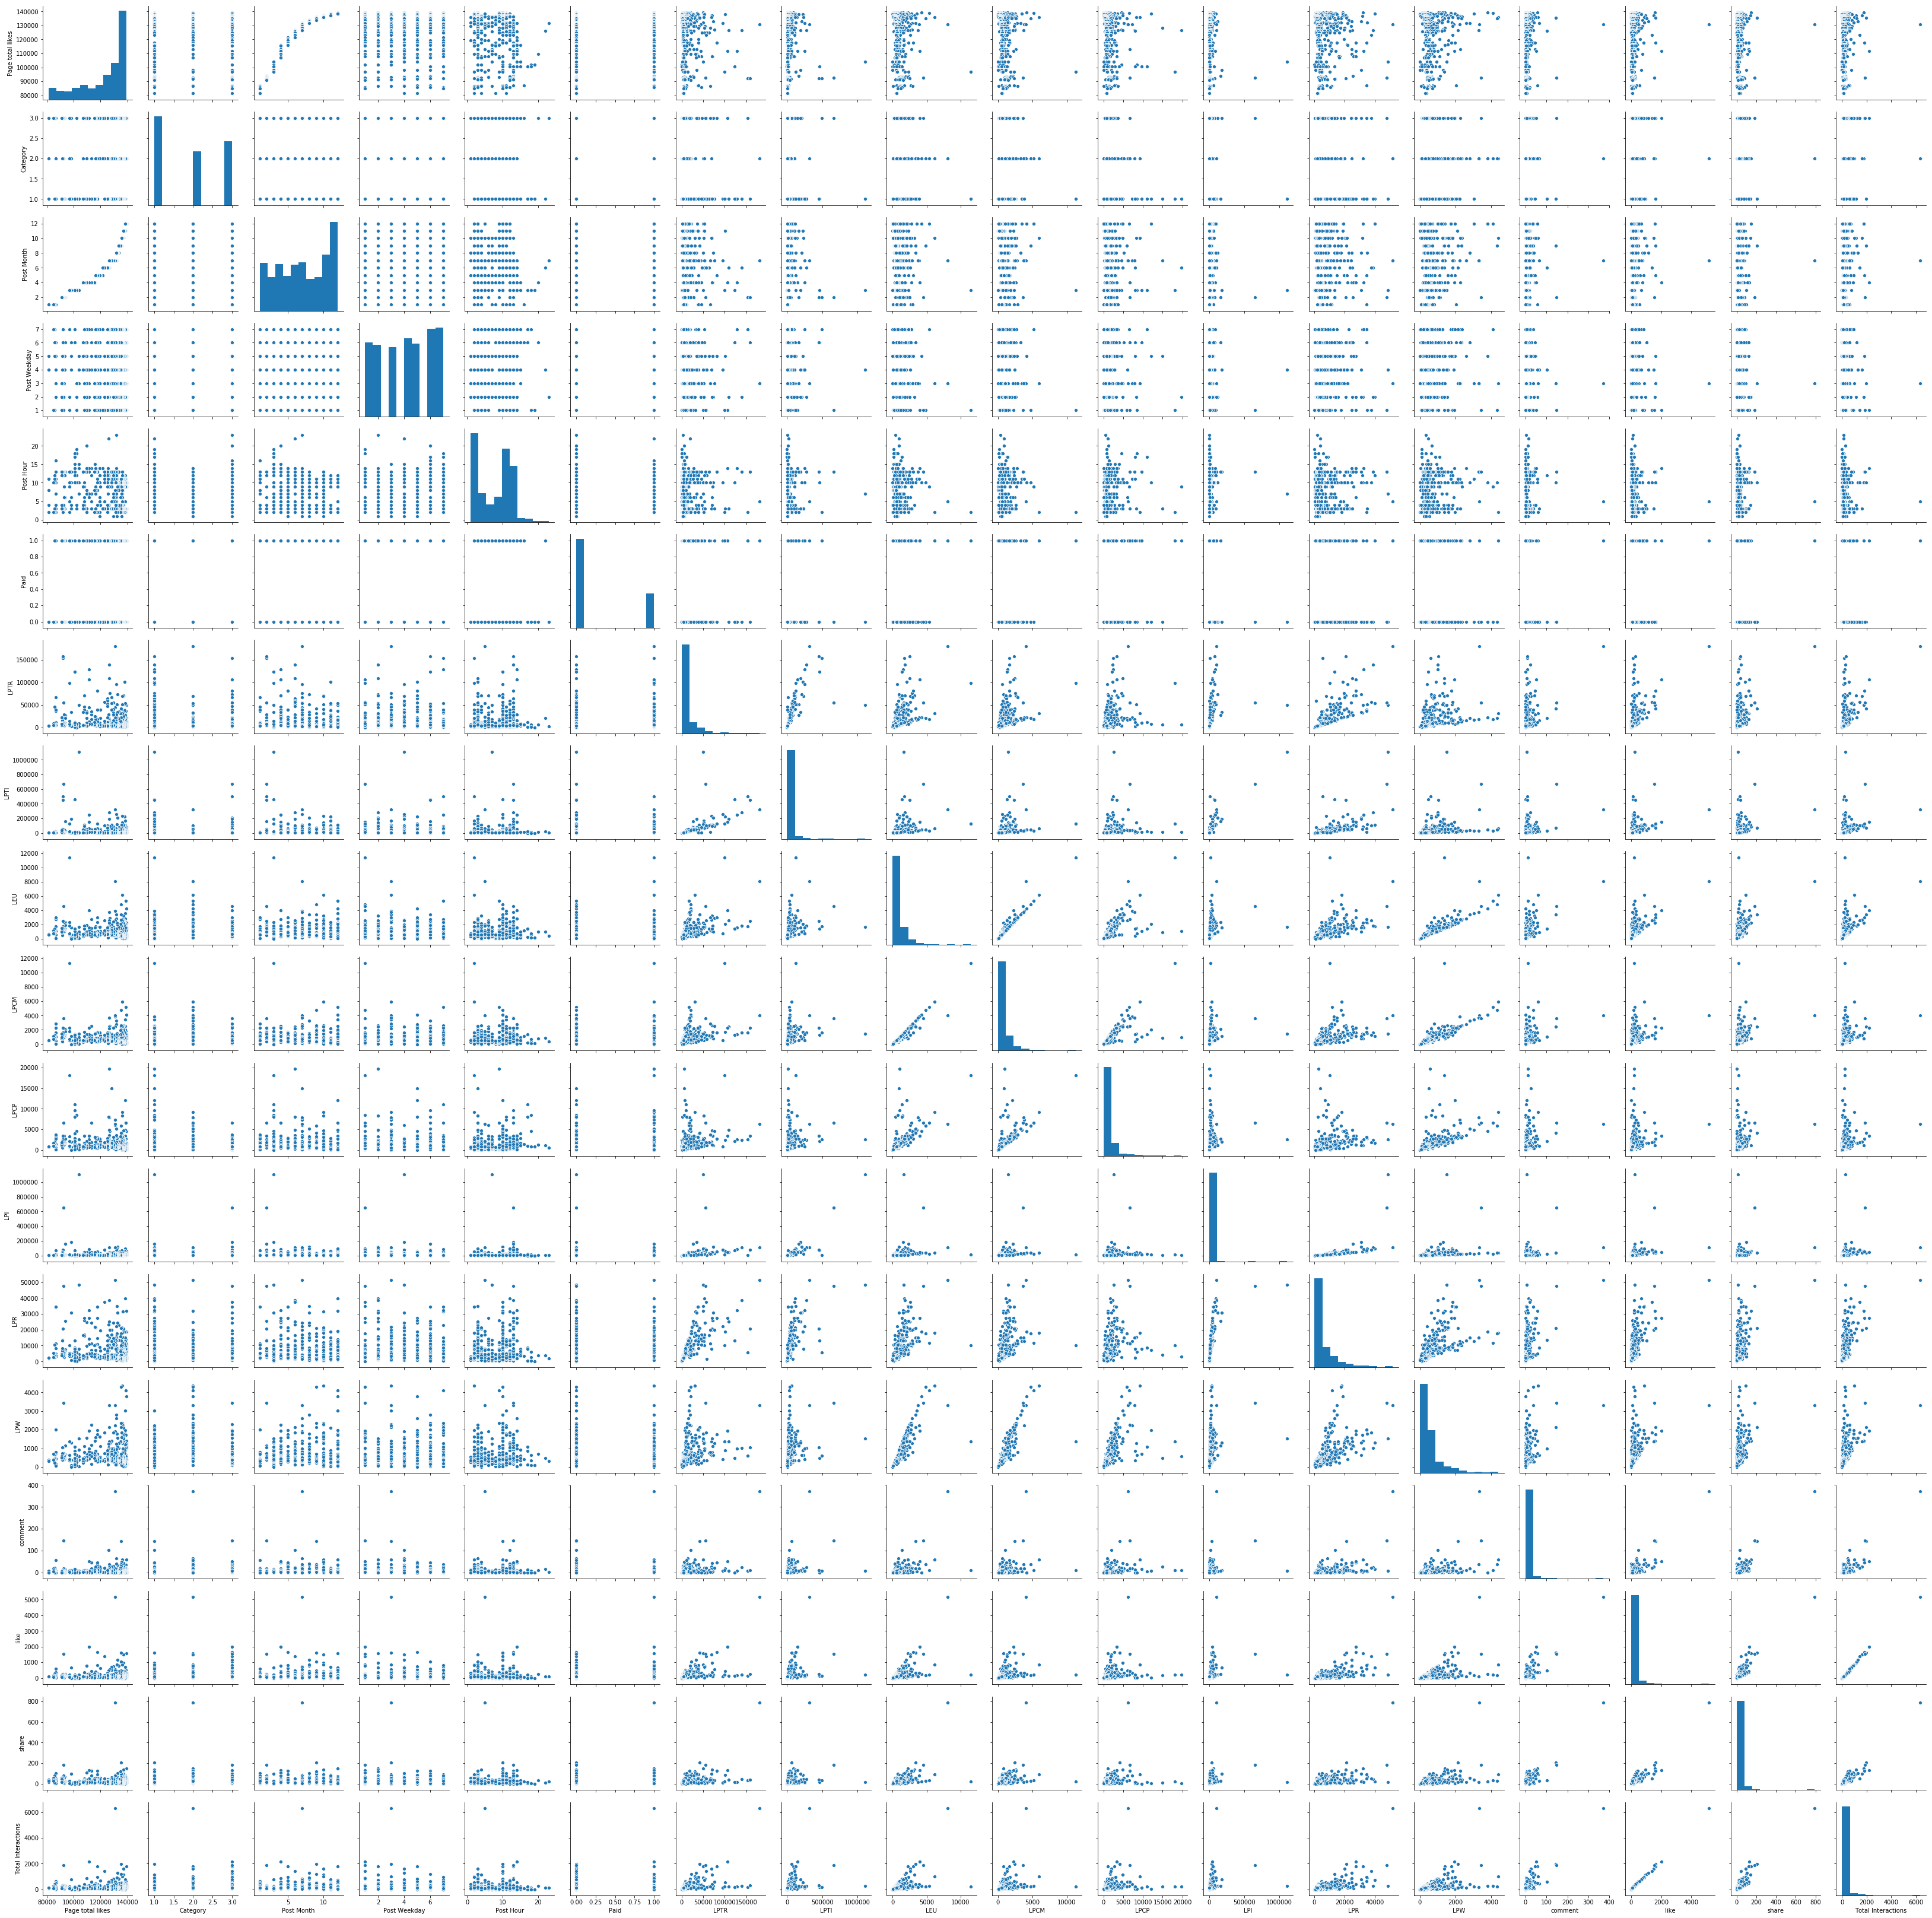

In [0]:
df['Type'] = df['Type'].apply(lambda x: str(x))
sns.pairplot(data=df)

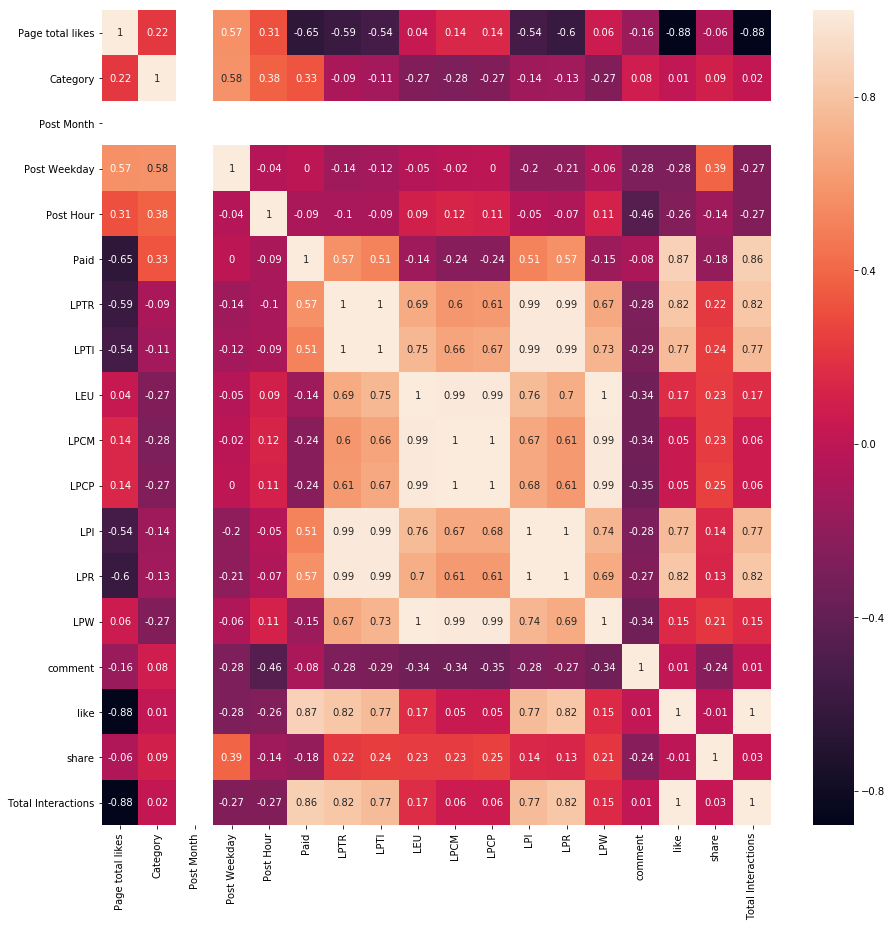

In [0]:
correlation_matrix = df.iloc[7:15].corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(15,15))     
sns.heatmap(data=correlation_matrix, annot = True, ax = ax)

**We found that LPCP, LEU, and LPW mostly correlate to LPCM**

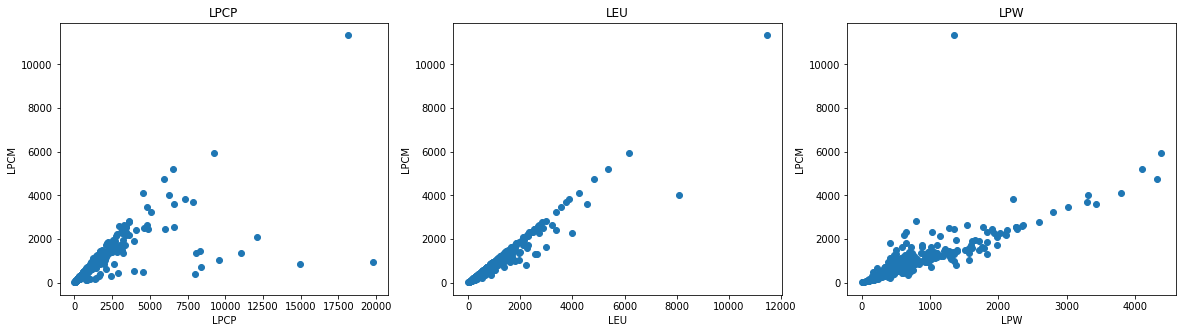

In [0]:
#LPCM, LPCP, LEU, LPW

plt.figure(figsize=(20, 5))

features = ['LPCP', 'LEU', 'LPW']
target = df['LPCM']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('LPCM')

**Sample preparation**

In [0]:
X = pd.DataFrame(np.c_[df['LPCP'], df['LEU'], df['LPW']], columns = ['LPCP','LEU','LPW'])
Y = df['LPCM']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400, 3)
(100, 3)
(400,)
(100,)


**10-fold cross validation**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.model_selection import KFold

r2scores = []
rmse = []
mae = []
lin_model = LinearRegression()

XX = np.array(X_train)
YY = np.array(Y_train)

cv = KFold(n_splits=10, random_state=42, shuffle=False)

for train_index, test_index in cv.split(XX):
    XX_train, XX_test, yy_train, yy_test = XX[train_index], XX[test_index], YY[train_index], YY[test_index]
    lin_model.fit(XX_train, yy_train)
    y_train_predict = lin_model.predict(XX_test)
    rmse.append(np.sqrt(mean_squared_error(yy_test, y_train_predict)))
    mae.append(mean_absolute_error(yy_test, y_train_predict))
    r2scores.append(lin_model.score(XX_test, yy_test))

**Evaluate using RMSE, MAE, and R2**

In [0]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
mae = mean_absolute_error(Y_test, y_test_predict)
r2 = lin_model.score(X_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MAE is {}'.format(mae))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 179.31351887616682
MAE is 101.86023631014952
R2 score is 1.0


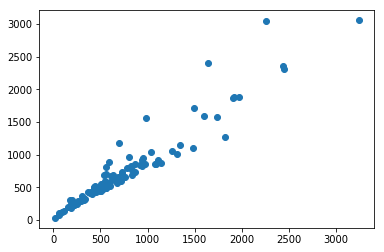

In [0]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()